# <center>Reinforcement Learning</center>
<center><h1 style="color:blue">Actor-Critic</h1></center>

# Implementing Advantage Actor Critic (A2C) and Solving Simple Environment

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import gym

In [ ]:
class ANet(nn.Module):
    def __init__(self):
        super(ANet,self).__init__()
        self.network=nn.Sequential(
            nn.Linear(4,128),nn.ReLU(),
            nn.Linear(128,2),nn.Softmax(dim=-1)
        )
    def forward(self,x):
        return self.network(x)

class CNet(nn.Module):
    def __init__(self):
        super(CNet,self).__init__()
        self.network=nn.Sequential(
            nn.Linear(4,128),nn.ReLU(),
            nn.Linear(128,1)
        )
    def forward(self,x):
        return self.network(x)

In [ ]:
def returns_calc(nxt_val,rwds,masks,gamma=0.99):
    R=nxt_val
    returns =[]
    for step in reversed(range(len(rwds))):
        R=rwds[step]+gamma*R*masks[step]
        returns.insert(0,R)
    return returns

In [ ]:
env_cartpole=gym.make("CartPole-v1")
actor=ANet()
crit=CNet()
optimA=optim.Adam(actor.parameters())
optimC=optim.Adam(crit.parameters())

In [ ]:
num_episodes = 1000
tot_rewards = []

for ep in range(num_episodes):
    stt,_ = env_cartpole.reset()
    done = False
    values = []
    rwds = []
    log_probs = []
    masks = []

    while not done:
        stt_tensor = torch.FloatTensor(stt).unsqueeze(0)
        dist = actor(stt_tensor)
        value = crit(stt_tensor)
        act_tensor = dist.multinomial(1)

        nxt_stt,rwd,terminated,truncated,_ = env_cartpole.step(act_tensor.item())
        done = terminated or truncated
        log_prob = torch.log(dist.squeeze(0)[act_tensor])
        log_probs.append(log_prob)
        values.append(value)
        rwds.append(torch.tensor([rwd],dtype=torch.float32))
        masks.append(torch.tensor([1-done],dtype=torch.float32))
        stt = nxt_stt

    nxt_stt_tensor = torch.FloatTensor(nxt_stt).unsqueeze(0)
    nxt_val = crit(nxt_stt_tensor)
    returns = returns_calc(nxt_val,rwds,masks)
    log_probs = torch.cat(log_probs)
    returns = torch.cat(returns).detach()
    values = torch.cat(values)
    adv = returns-values

    act_loss = -(log_probs * adv.detach()).mean()
    crit_loss = adv.pow(2).mean()

    optimA.zero_grad()
    optimC.zero_grad()

    act_loss.backward()
    crit_loss.backward()

    optimA.step()
    optimC.step()

    my_reward = sum([r.item() for r in rwds])
    tot_rewards.append(my_reward)
    print(f'Episode {ep},Total rwd-simple env:{my_reward}')


Episode 0, Total rwd - simple env:19.0
Episode 1, Total rwd - simple env:28.0
Episode 2, Total rwd - simple env:26.0
Episode 3, Total rwd - simple env:9.0
Episode 4, Total rwd - simple env:23.0
Episode 5, Total rwd - simple env:10.0
Episode 6, Total rwd - simple env:20.0
Episode 7, Total rwd - simple env:11.0
Episode 8, Total rwd - simple env:20.0
Episode 9, Total rwd - simple env:15.0
Episode 10, Total rwd - simple env:22.0
Episode 11, Total rwd - simple env:10.0
Episode 12, Total rwd - simple env:12.0
Episode 13, Total rwd - simple env:19.0
Episode 14, Total rwd - simple env:15.0
Episode 15, Total rwd - simple env:14.0
Episode 16, Total rwd - simple env:18.0
Episode 17, Total rwd - simple env:13.0
Episode 18, Total rwd - simple env:17.0
Episode 19, Total rwd - simple env:15.0
Episode 20, Total rwd - simple env:14.0
Episode 21, Total rwd - simple env:38.0
Episode 22, Total rwd - simple env:16.0
Episode 23, Total rwd - simple env:10.0
Episode 24, Total rwd - simple env:41.0
Episode 25,

Episode 223, Total rwd - simple env:69.0
Episode 224, Total rwd - simple env:90.0
Episode 225, Total rwd - simple env:39.0
Episode 226, Total rwd - simple env:74.0
Episode 227, Total rwd - simple env:35.0
Episode 228, Total rwd - simple env:30.0
Episode 229, Total rwd - simple env:45.0
Episode 230, Total rwd - simple env:28.0
Episode 231, Total rwd - simple env:67.0
Episode 232, Total rwd - simple env:97.0
Episode 233, Total rwd - simple env:53.0
Episode 234, Total rwd - simple env:99.0
Episode 235, Total rwd - simple env:70.0
Episode 236, Total rwd - simple env:27.0
Episode 237, Total rwd - simple env:91.0
Episode 238, Total rwd - simple env:44.0
Episode 239, Total rwd - simple env:27.0
Episode 240, Total rwd - simple env:44.0
Episode 241, Total rwd - simple env:88.0
Episode 242, Total rwd - simple env:35.0
Episode 243, Total rwd - simple env:78.0
Episode 244, Total rwd - simple env:119.0
Episode 245, Total rwd - simple env:41.0
Episode 246, Total rwd - simple env:37.0
Episode 247, To

Episode 425, Total rwd - simple env:243.0
Episode 426, Total rwd - simple env:221.0
Episode 427, Total rwd - simple env:128.0
Episode 428, Total rwd - simple env:247.0
Episode 429, Total rwd - simple env:231.0
Episode 430, Total rwd - simple env:331.0
Episode 431, Total rwd - simple env:221.0
Episode 432, Total rwd - simple env:124.0
Episode 433, Total rwd - simple env:121.0
Episode 434, Total rwd - simple env:234.0
Episode 435, Total rwd - simple env:380.0
Episode 436, Total rwd - simple env:291.0
Episode 437, Total rwd - simple env:188.0
Episode 438, Total rwd - simple env:500.0
Episode 439, Total rwd - simple env:264.0
Episode 440, Total rwd - simple env:120.0
Episode 441, Total rwd - simple env:278.0
Episode 442, Total rwd - simple env:189.0
Episode 443, Total rwd - simple env:227.0
Episode 444, Total rwd - simple env:243.0
Episode 445, Total rwd - simple env:231.0
Episode 446, Total rwd - simple env:421.0
Episode 447, Total rwd - simple env:260.0
Episode 448, Total rwd - simple en

Episode 622, Total rwd - simple env:374.0
Episode 623, Total rwd - simple env:397.0
Episode 624, Total rwd - simple env:500.0
Episode 625, Total rwd - simple env:500.0
Episode 626, Total rwd - simple env:500.0
Episode 627, Total rwd - simple env:163.0
Episode 628, Total rwd - simple env:500.0
Episode 629, Total rwd - simple env:500.0
Episode 630, Total rwd - simple env:500.0
Episode 631, Total rwd - simple env:500.0
Episode 632, Total rwd - simple env:500.0
Episode 633, Total rwd - simple env:500.0
Episode 634, Total rwd - simple env:500.0
Episode 635, Total rwd - simple env:500.0
Episode 636, Total rwd - simple env:500.0
Episode 637, Total rwd - simple env:500.0
Episode 638, Total rwd - simple env:500.0
Episode 639, Total rwd - simple env:500.0
Episode 640, Total rwd - simple env:500.0
Episode 641, Total rwd - simple env:500.0
Episode 642, Total rwd - simple env:500.0
Episode 643, Total rwd - simple env:500.0
Episode 644, Total rwd - simple env:500.0
Episode 645, Total rwd - simple en

Episode 820, Total rwd - simple env:500.0
Episode 821, Total rwd - simple env:500.0
Episode 822, Total rwd - simple env:301.0
Episode 823, Total rwd - simple env:500.0
Episode 824, Total rwd - simple env:500.0
Episode 825, Total rwd - simple env:500.0
Episode 826, Total rwd - simple env:500.0
Episode 827, Total rwd - simple env:500.0
Episode 828, Total rwd - simple env:500.0
Episode 829, Total rwd - simple env:500.0
Episode 830, Total rwd - simple env:151.0
Episode 831, Total rwd - simple env:500.0
Episode 832, Total rwd - simple env:500.0
Episode 833, Total rwd - simple env:500.0
Episode 834, Total rwd - simple env:500.0
Episode 835, Total rwd - simple env:500.0
Episode 836, Total rwd - simple env:500.0
Episode 837, Total rwd - simple env:500.0
Episode 838, Total rwd - simple env:500.0
Episode 839, Total rwd - simple env:500.0
Episode 840, Total rwd - simple env:500.0
Episode 841, Total rwd - simple env:500.0
Episode 842, Total rwd - simple env:500.0
Episode 843, Total rwd - simple en

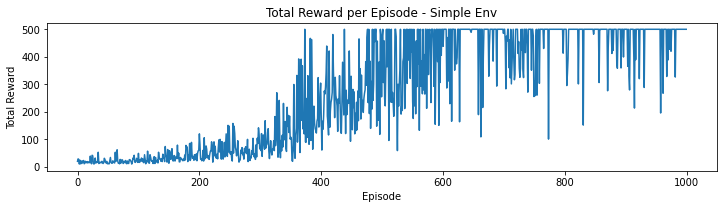

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(tot_rewards)
plt.title('Total Reward per Episode-Simple Env')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

In [ ]:
eval_epis_no = 10
eval_rwds = []
for eval_epi in range(eval_epis_no):
    stt,_ = env_cartpole.reset()
    done = False
    my_reward = 0
    while not done:
        stt_tensor = torch.FloatTensor(stt).unsqueeze(0)
        with torch.no_grad():
            act_probs = actor(stt_tensor)
        act_index = torch.argmax(act_probs).item()
        nxt_stt,rwd,terminated,truncated,_ = env_cartpole.step(act_index)
        my_reward += rwd
        stt = nxt_stt
        done = terminated or truncated        
    eval_rwds.append(my_reward)
    print(f'Evaluation Episode {eval_epi+1},Total rwd-simple env: {my_reward}')


Evaluation Episode 1, Total rwd - simple env: 500.0
Evaluation Episode 2, Total rwd - simple env: 500.0
Evaluation Episode 3, Total rwd - simple env: 500.0
Evaluation Episode 4, Total rwd - simple env: 500.0
Evaluation Episode 5, Total rwd - simple env: 500.0
Evaluation Episode 6, Total rwd - simple env: 500.0
Evaluation Episode 7, Total rwd - simple env: 500.0
Evaluation Episode 8, Total rwd - simple env: 500.0
Evaluation Episode 9, Total rwd - simple env: 500.0
Evaluation Episode 10, Total rwd - simple env: 500.0


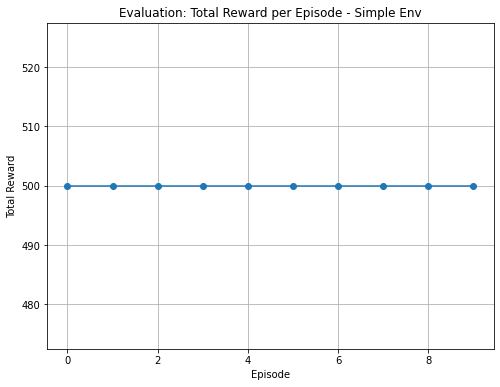

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(eval_rwds,marker='o')
plt.title('Evaluation: Total Reward per Episode-Simple Env')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid(True)
plt.show()

In [ ]:
torch.save(actor.state_dict(),'part1_env_cartpole_actor_model.pth')
torch.save(crit.state_dict(),'part1_env_cartpole_critic_model.pth')